# Interpolate between profiles (spatial or temporal)

In [9]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/bell/Downloads/ALAMO SN9119.txt','\t',
                 parse_dates=['yyyy-mm-ddThh:mm:ss.sss'])

In [16]:
ddata = df.groupby('Station').first()
ddata

,Cruise,Longitude [degrees_east],Latitude [degrees_north],yyyy-mm-ddThh:mm:ss.sss,PRES [decibar],TEMP [degree_Celsius],PSAL [PSU]
Station,,,,,,,
0,9119,-166.926626,70.012068,2017-09-13 22:37:54+00:00,-0.040000,7.275,26.677
1,9119,-166.871852,70.036898,2017-09-14 04:01:25+00:00,0.520000,7.362,30.934
2,9119,-166.809336,70.069938,2017-09-14 10:03:54+00:00,0.425469,6.967,27.146
3,9119,-166.746328,70.103588,2017-09-14 16:03:46+00:00,0.339414,7.164,26.286
4,9119,-166.687622,70.143203,2017-09-14 22:02:06+00:00,0.253652,7.229,24.954
...,...,...,...,...,...,...,...
596,9119,-165.370793,72.336092,2017-12-08 02:47:26+00:00,0.002285,-1.997,11.240
597,9119,-165.381518,72.338155,2017-12-08 03:35:51+00:00,0.170769,-1.539,31.267
598,9119,-165.391549,72.340610,2017-12-08 04:28:57+00:00,-0.014192,-1.748,17.390


In [17]:
ddata[np.isnan(ddata['Longitude [degrees_east]'])]

,Cruise,Longitude [degrees_east],Latitude [degrees_north],yyyy-mm-ddThh:mm:ss.sss,PRES [decibar],TEMP [degree_Celsius],PSAL [PSU]
Station,,,,,,,
7,9119,NaN,NaN,2017-09-15 16:01:21+00:00,-0.084531,6.901,29.166
31,9119,NaN,NaN,2017-09-18 16:03:56+00:00,0.025117,6.426,17.248
58,9119,NaN,NaN,2017-09-22 10:10:00+00:00,0.013317,6.299,17.792
62,9119,NaN,NaN,2017-09-23 10:04:38+00:00,0.280000,6.158,18.011
82,9119,NaN,NaN,2017-09-28 10:08:24+00:00,-0.067852,5.858,18.150
...,...,...,...,...,...,...,...
523,9119,NaN,NaN,2017-12-05 08:04:22+00:00,0.201345,-1.556,32.053
530,9119,NaN,NaN,2017-12-05 15:12:03+00:00,0.203825,-1.571,31.708
547,9119,NaN,NaN,2017-12-06 08:30:54+00:00,0.360000,-1.639,30.540


In [42]:
fdata = ddata.set_index(pd.DatetimeIndex(ddata['yyyy-mm-ddThh:mm:ss.sss']))
fdata['Longitude [degrees_east]'] = fdata['Longitude [degrees_east]'].interpolate()
fdata['Latitude [degrees_north]'] = fdata['Latitude [degrees_north]'].interpolate()

In [4]:
import pygmt

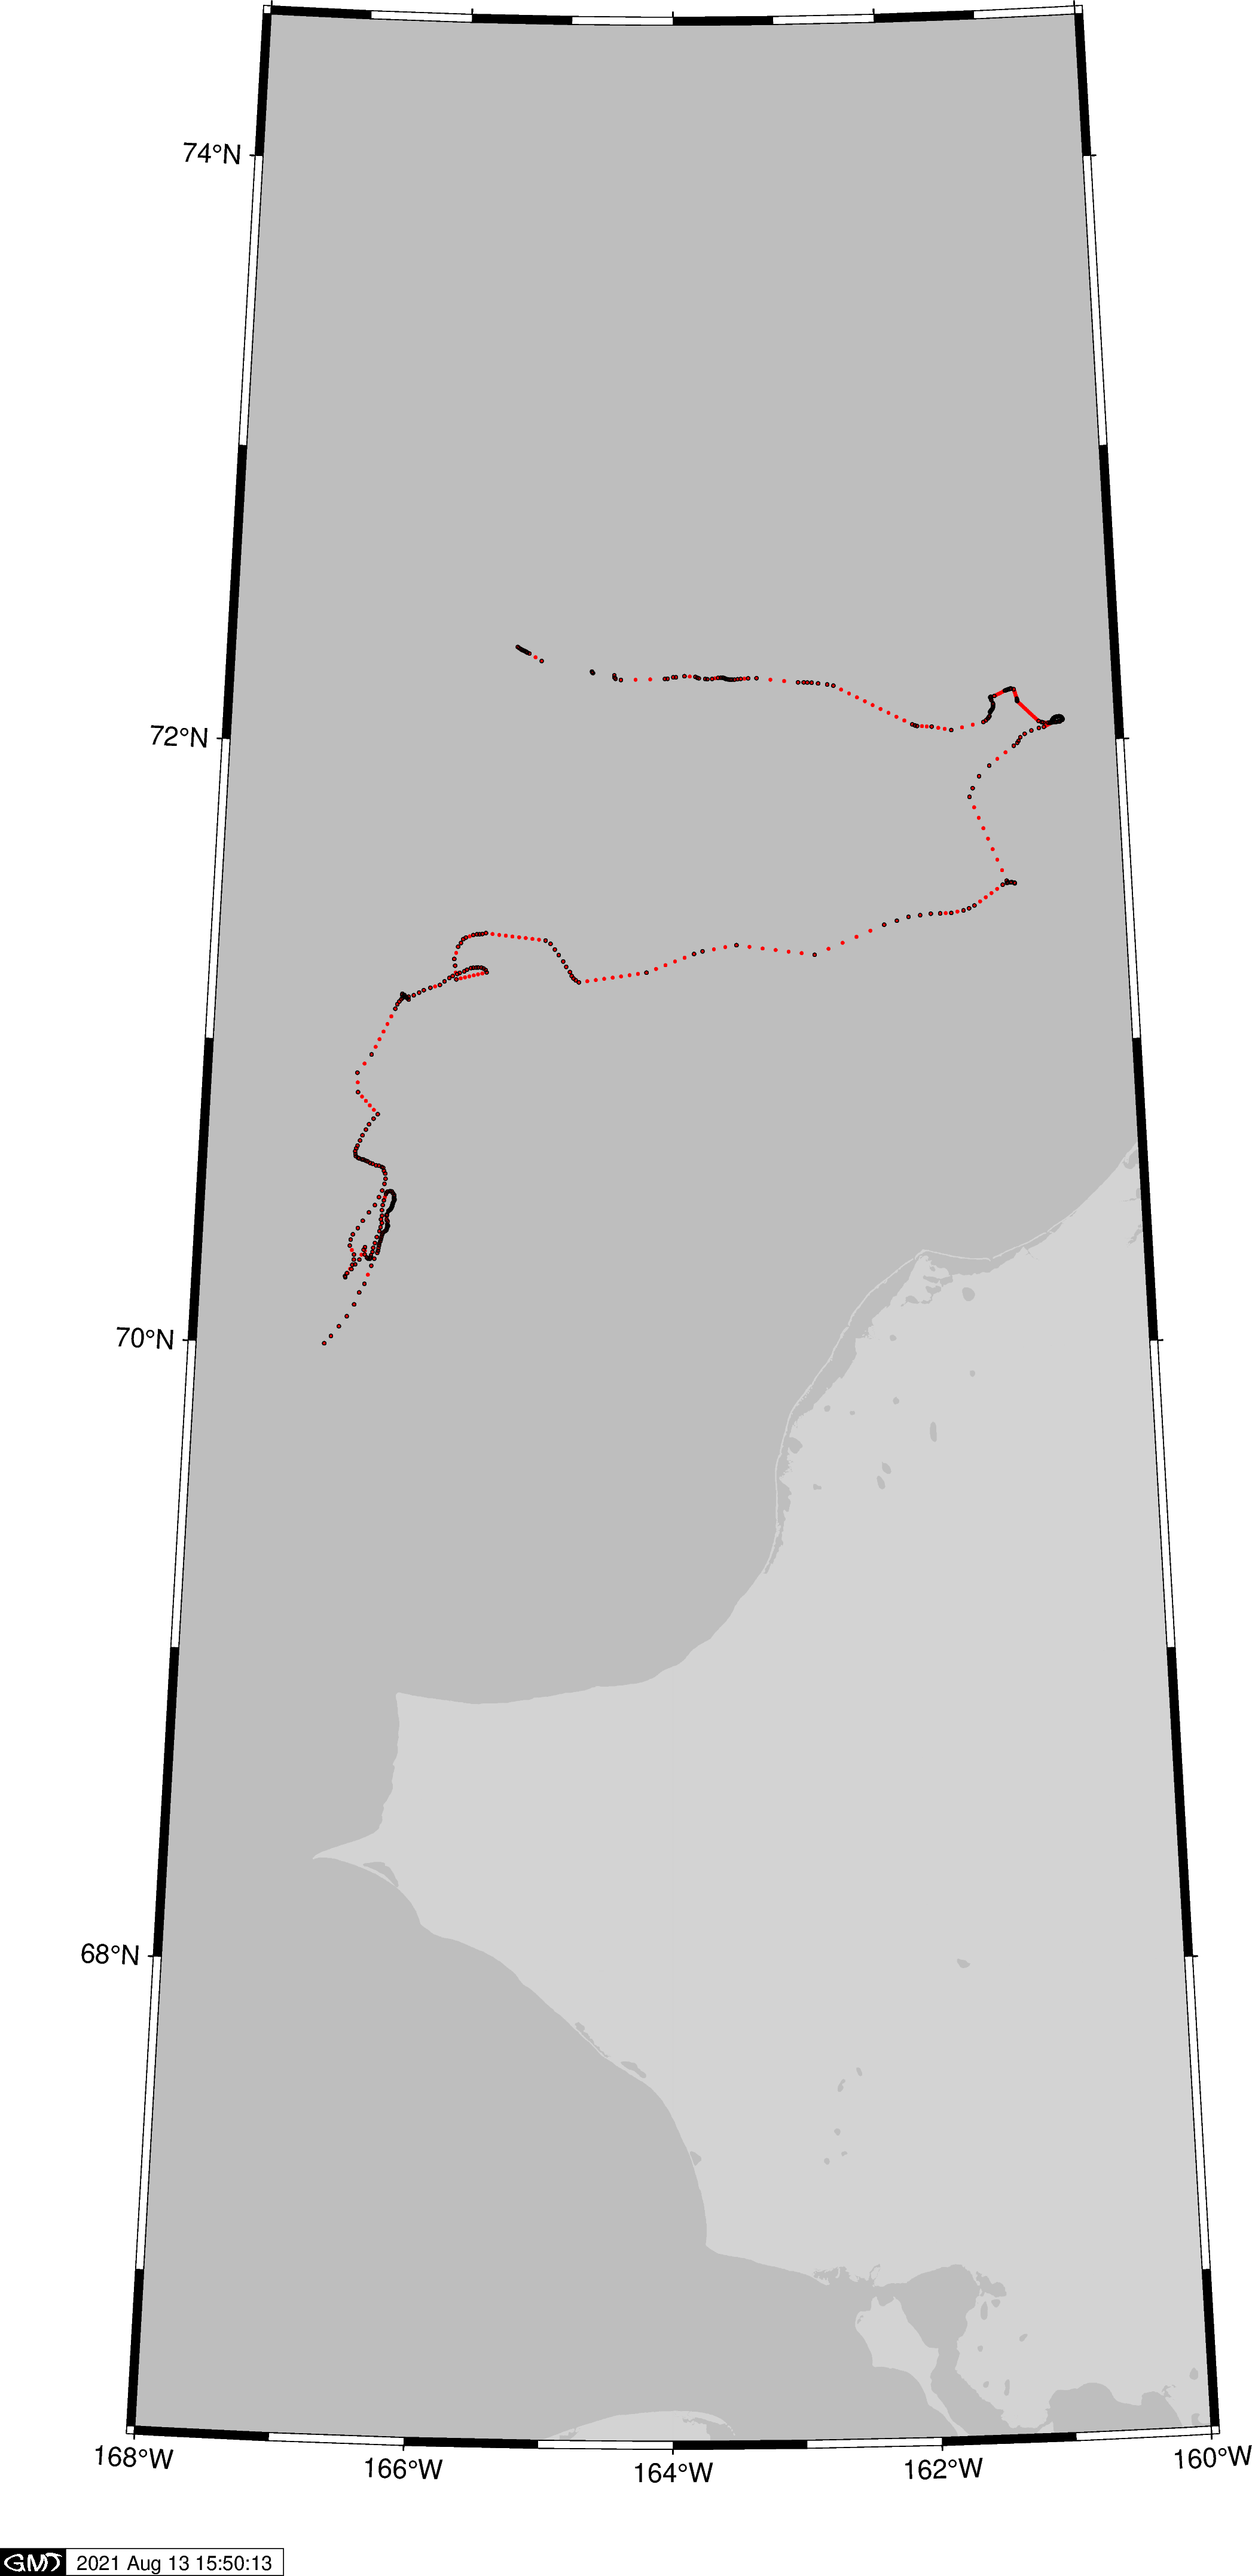

In [52]:
fig = pygmt.Figure()

fig.coast(region=[-168, -160, 66.5, 74.5], projection='B-164/54/52/56/6i', land='lightgray', water='gray',
          frame=True,timestamp=True)

fig.plot(x=fdata['Longitude [degrees_east]'], y=fdata['Latitude [degrees_north]'], style='c0.05c',color='red')

fig.plot(x=ddata['Longitude [degrees_east]'], y=ddata['Latitude [degrees_north]'], style='c0.05c')

fig.show()
# fig.savefig("~/Desktop/ALAMO_SN9119-interp-loc.eps")

In [53]:
fdata.to_csv('/Users/bell/Downloads/ALAMO SN9119-interp.txt')